In [3]:
import numpy as np
import scanpy as sc
import anndata
import pandas as pd

In [15]:
X = anndata.read_h5ad("/opt/andrew/ccc/bal_alad.h5ad")

In [34]:
cell_type_markers = {
    "DC": ["LGALS2", "MS4A6A", "HLA-DQA1", "HLA-DQA2"],
    "pDC": ["SERPINF1", "LILRA"],
    "B": ["TCL1A", "MS4A1", "BANK1", "IGJ", "CD79A"],
    "CD4 T": ["CCD7", "MAL", "LEF1", "IL7R", "RTKN1", "ITGB1"],
    "CD8 T": ["CD8A", "CD8B", "GZMK", "GZMH"],
    "NK": ["NKG7", "KLRD1", "KLRF1", "NCR1", "DOCK2", "GZMA"],
    "Monocytes": ["APOBEC3A", "LYZ", "CD14", "CFP", "HLA-DRA", "S100A9", "S100A8", "CSF3R"],
    "Macrophages": ["CD68", "FCGR1", "NAAA", "JAML", "TYROBP", "LYZ2", "H2-DMA"],
    "Prolif": ["STMN1"],
    "Mast": ["SLC29A1", "KIT", "LTC4S", "TPSAB1", "IL1RL1", "HDC", "TPSB2"],
    "mDC": ["S100A4", "S100A9", "ICAM1", "S100A8", "ITGAM", "LY6G", "GR1"],
    "Neutrophils": ["CSF3R", "LY6G", "S100A8", "TREM1", "IL1R2", "CFP", "ADAM8"],
    "Epithelial": ["EPCAM", "KRT19", "KRT8", "KRT18", "KRT7", "CDH1", "AGER", "HOPX", "SFTPC"]
}

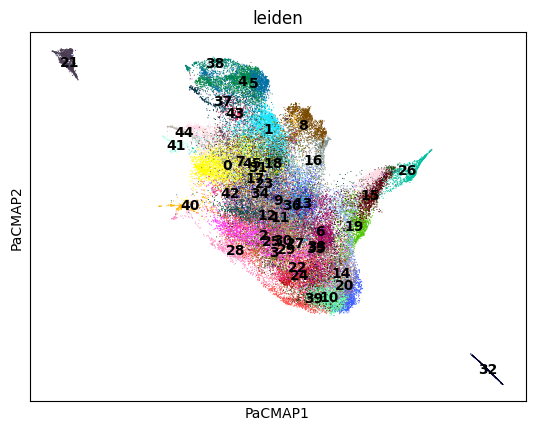

46


In [26]:
sc.pp.neighbors(X, use_rep="projections", random_state=0)
sc.tl.leiden(X, random_state=0, resolution=2.5)
sc.pl.embedding(basis="PaCMAP", adata=X, color=["leiden"], legend_loc='on data')
print(len(np.unique(X.obs['leiden'])))

/home/aramirez/cellcommunication-Pf2/.venv/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/home/aramirez/cellcommunication-Pf2/.venv/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/home/aramirez/cellcommunication-Pf2/.venv/lib/python3.11/site-packages/scanpy/tools/_rank_gene

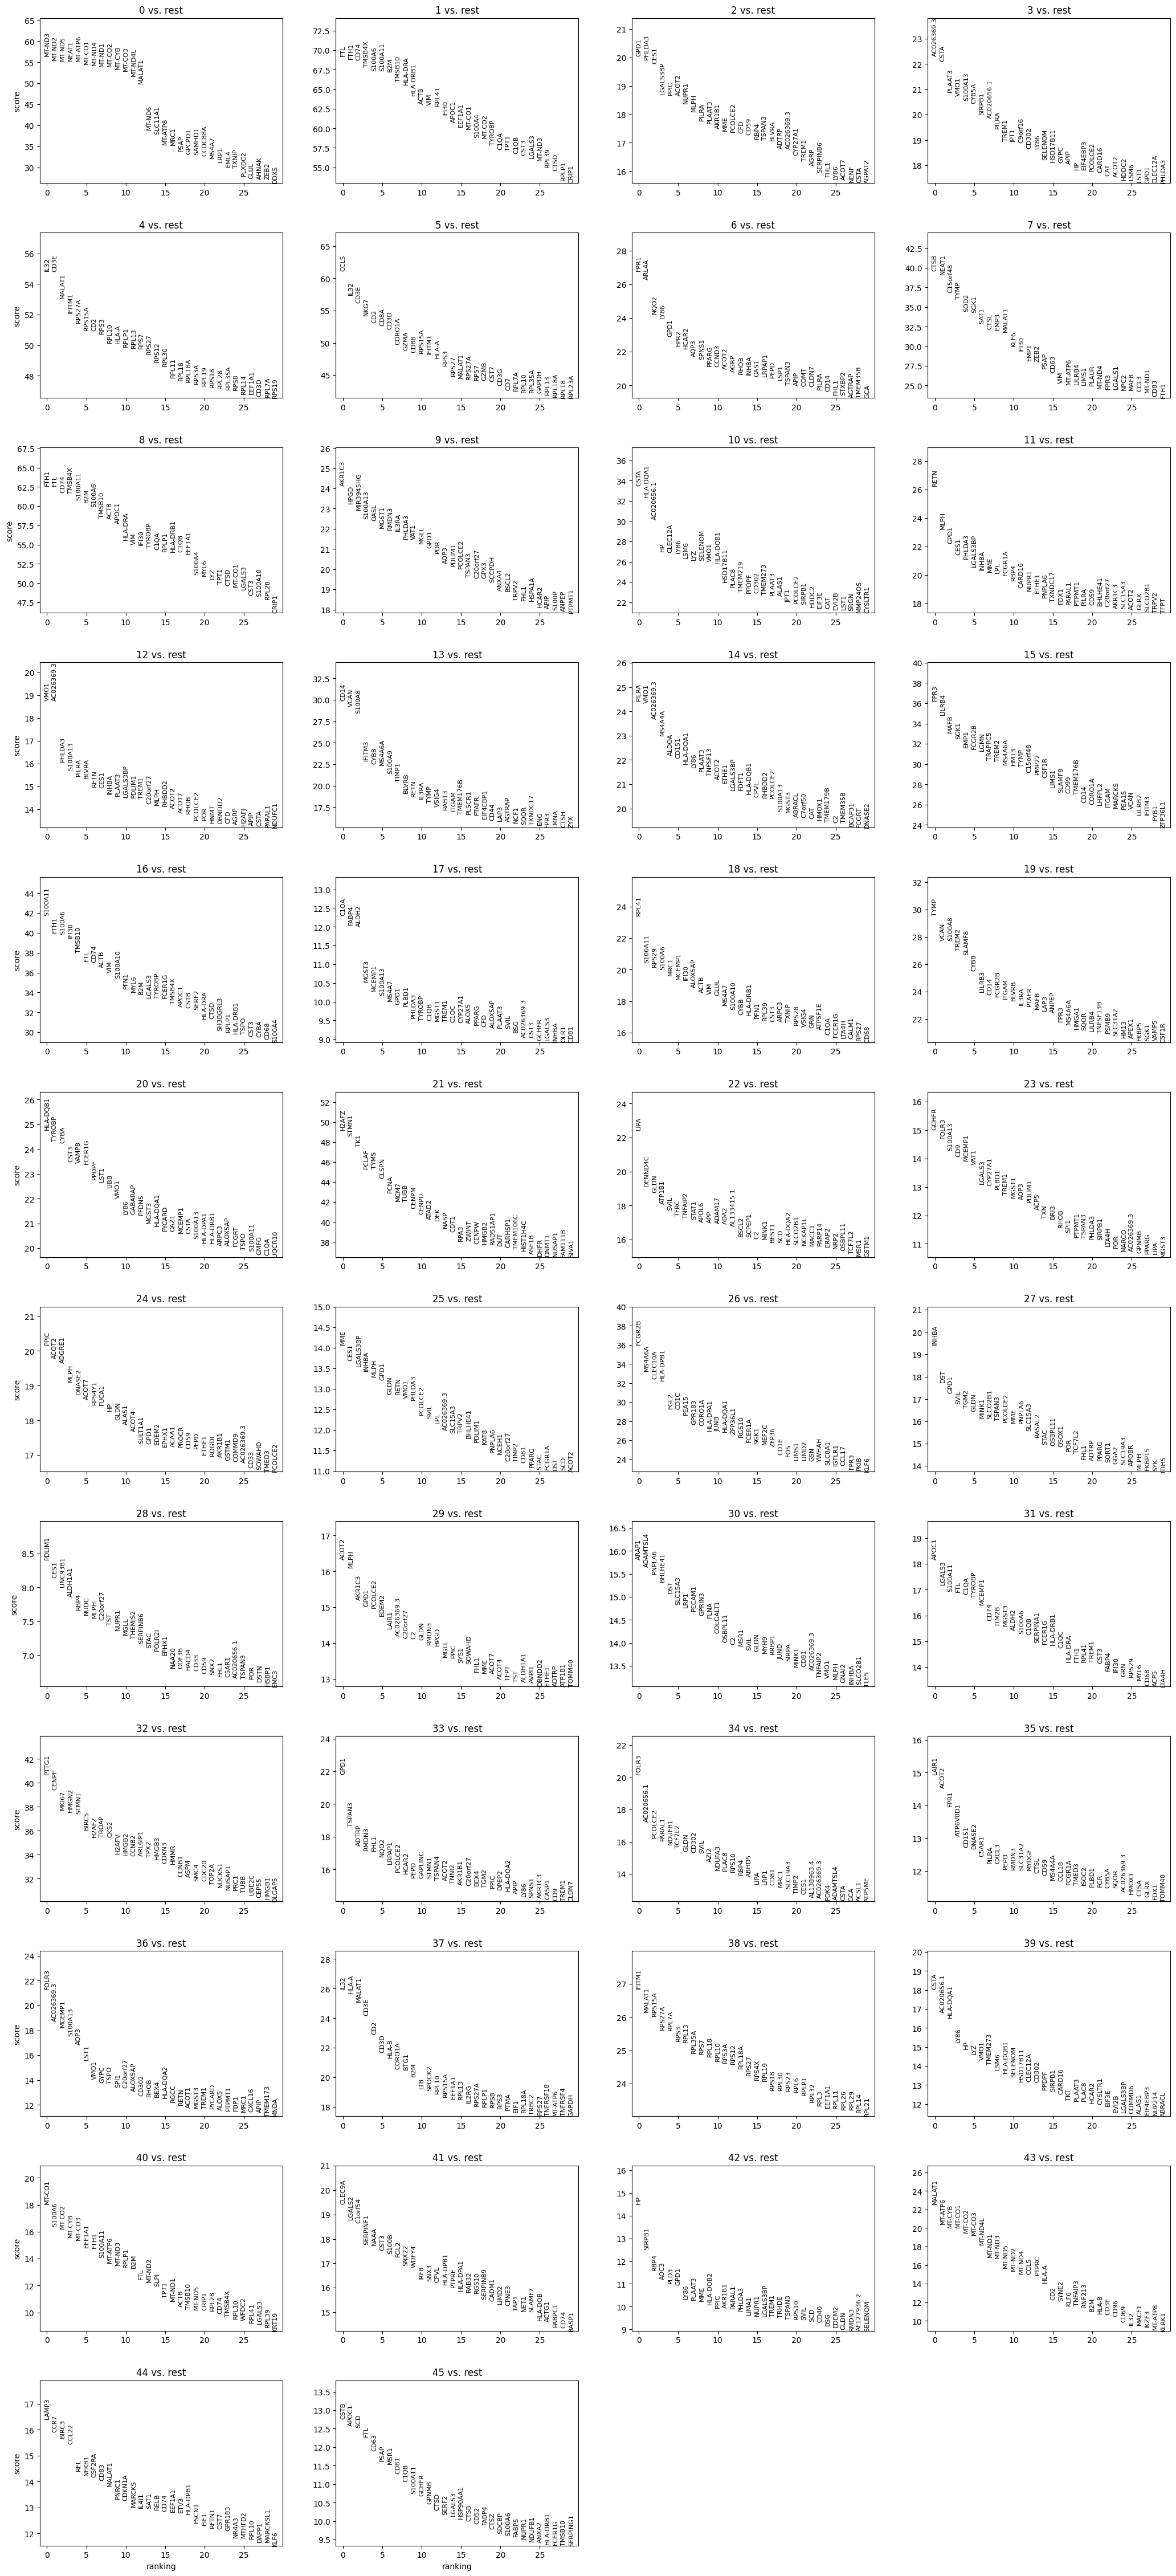

In [27]:
sc.tl.rank_genes_groups(X, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(X, n_genes=30, sharey=False, save=True)

In [35]:
cellDF = sc.tl.marker_gene_overlap(X, cell_type_markers)
with pd.option_context(
    "display.max_rows",
    None,
    "display.max_columns",
    None,
    "display.precision",
    3,
):
    print(cellDF)

               0    1    2    3    4    5    6    7    8    9   10   11   12  \
DC           0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   
pDC          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
B            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
CD4 T        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
CD8 T        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
NK           0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Monocytes    0.0  2.0  0.0  0.0  0.0  0.0  1.0  0.0  2.0  0.0  1.0  0.0  0.0   
Macrophages  0.0  2.0  0.0  1.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0  0.0   
Prolif       0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Mast         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
mDC          0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
Neutrophils  0.0  0.0  1.0  1.0  0.0  0.

In [41]:
cell_type_layers = {
    "0": "0",           "1": "Monocyte",      "2": "Neutrophil",    "3": "Macrophage",    "4": "4",
    "5": "NK",            "6": "Monocyte",      "7": "7",           "8": "Monocyte",      "9": "CD4 T",
    "10": "DC",           "11": "Neutrophil",   "12": "Neutrophil",   "13": "Monocyte",     "14": "Macrophage",
    "15": "Monocyte",     "16": "Macrophage",   "17": "Macrophage",   "18": "Monocyte",     "19": "Monocyte",
    "20": "Monocyte",     "21": "Prolif",       "22": "DC",           "23": "Neutrophil",   "24": "24",
    "25": "Neutrophil",   "26": "DC",           "27": "DC",           "28": "28",          "29": "29",
    "30": "30",          "31": "Macrophage",   "32": "Prolif",     "33": "Neutrophil",   "34": "Macrophage",
    "35": "35",     "36": "Neutrophil",   "37": "37",     "38": "NK",   "39": "Macrophage",
    "40": "Epithelial",     "41": "DC",   "42": "Macrophage",     "43": "NK",   "44": "DC",
    "45": "Macrophage"
}

In [42]:
X.obs["cell_type"] = X.obs.leiden.replace(cell_type_layers)

/tmp/ipykernel_1291365/1902861377.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X.obs["cell_type"] = X.obs.leiden.replace(cell_type_layers)


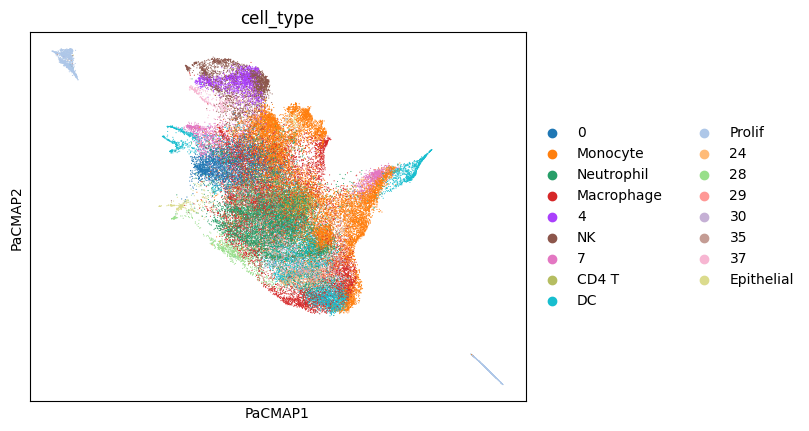

In [43]:
sc.pl.embedding(basis="PaCMAP", adata=X, color=["cell_type"])